This program is created to Explore and evaluate the XBOX game recommendation system data. The dataset is taken from best buy and has details about the user queries. We have performed exploratory data analysis on the data to find similar users and correlation between the different games 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#import Training data
train = pd.read_csv('all/train.csv', sep = ',')

In [3]:
train.head()

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206


In [4]:
import seaborn as sns

In [5]:
#count of users based on the queries
train.groupby(train['query']).count().head(20)

,user,sku,category,click_time,query_time
query,,,,,
#,6,6,6,6,6
*,2,2,2,2,2
.wwe 12,1,1,1,1,1
//,1,1,1,1,1
0,1,1,1,1,1
007,2,2,2,2,2
007 video games,1,1,1,1,1
007 blood stone,1,1,1,1,1
1 month xbox,1,1,1,1,1


In [6]:
train.describe

<bound method NDFrame.describe of                                            user      sku      category  \
0      0001cd0d10bbc585c9ba287c963e00873d4c0bfd  2032076  abcat0701002   
1      00033dbced6acd3626c4b56ff5c55b8d69911681  9854804  abcat0701002   
2      00033dbced6acd3626c4b56ff5c55b8d69911681  2670133  abcat0701002   
3      00033dbced6acd3626c4b56ff5c55b8d69911681  9984142  abcat0701002   
4      0007756f015345450f7be1df33695421466b7ce4  2541184  abcat0701002   
5      000878e35cb70ace315dbdbef54c22477066f07e  3046066  abcat0701002   
6      0008b7e06bc3d329b4dc052268e10b98c9121452  2977637  abcat0701002   
7      0008f35cccf771838c635196205951403f13da50  2670133  abcat0701002   
8      000c22a204a9248e3e5458ed52a084b98ddfcf56  9328943  abcat0701002   
9      000f573f22d30ead7a0a3d7fce64d3eb1cb8d0be  1180104  abcat0701002   
10     000f573f22d30ead7a0a3d7fce64d3eb1cb8d0be  2598445  abcat0701002   
11     001030de8986025507e5e95633b60c408861c5f6  1563461  abcat0701002   
12  

In [7]:
#Split the data into training and testing
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(train, test_size=0.25)

C:\Users\kashi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
#group by the queries to see the SKUs
train.groupby('query')['sku'].sum().sort_values(ascending =False).head()

query
Xbox bundles      9999169103505426
Gears of war 3         10194921532
gears of war 3          5707988268
Gears of war            4053697046
Dead island             3449237156
Name: sku, dtype: int64

In [9]:
#creating sparse matrix for user,query and SKUs
train_matrix = train.pivot_table(index = 'user', columns='query', values = 'sku')

In [10]:
train_matrix.head()

query,#,*,.wwe 12,//,0,007,007 video games,007 blood stone,1 month xbox,1067848,...,zumba,zumba dvd,zumba dvd,zumba fitness,zumba for kinect,zumba for xbox,zumba game,zumba video game,zumba workout dvd,zumbaa
user,,,,,,,,,,,,,,,,,,,,,
0001cd0d10bbc585c9ba287c963e00873d4c0bfd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00033dbced6acd3626c4b56ff5c55b8d69911681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007756f015345450f7be1df33695421466b7ce4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000878e35cb70ace315dbdbef54c22477066f07e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0008b7e06bc3d329b4dc052268e10b98c9121452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#find correlation for game gears of war
game_gearsofwar = train_matrix['Gears of war']
game_gearsofwar.head()

user
0001cd0d10bbc585c9ba287c963e00873d4c0bfd          NaN
00033dbced6acd3626c4b56ff5c55b8d69911681    6262468.5
0007756f015345450f7be1df33695421466b7ce4          NaN
000878e35cb70ace315dbdbef54c22477066f07e          NaN
0008b7e06bc3d329b4dc052268e10b98c9121452          NaN
Name: Gears of war, dtype: float64

In [12]:
#vectorize the users to user_id using dictionary, same users are assigned same user id
new_dict =dict()
iter_no =0
for index in train['user']:
    if(index not in new_dict):
        new_dict[index] = iter_no
    iter_no +=1

In [14]:
X =[]
for index in train['user']:
    X.append(new_dict[index])

In [18]:
train['new_user'] = X
train.head()

,user,sku,category,query,click_time,query_time,new_user
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,0
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,1
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,1
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,1
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,4


In [21]:
#vectorize the query to query_id using dictionary, same users are assigned same user id
new_dict1 =dict()
iter_no =0
for index in train['query']:
    if(index not in new_dict1):
        new_dict1[index] = iter_no
    iter_no +=1

Y =[]
for index in train['query']:
    Y.append(new_dict1[index])
train['new_query'] = Y
train.head()

,user,sku,category,query,click_time,query_time,new_user,new_query
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,0,0
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,1,1
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,1,1
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,1,3
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,4,4


In [29]:
n_users = len(train['new_user'])
n_query = len(train['new_query'])

In [31]:
#create user-query similarity matrix
train_user = np.zeros((n_users,n_query))
for line in train.itertuples():
    train_user[line[7],line[8]]= line[2]
    


In [35]:
#calculate pairwise distances using cosine similarity
from sklearn.metrics.pairwise import pairwise_distances
user_sim = pairwise_distances(train_user, metric = 'cosine')

In [46]:
def predict(sku ,similarity, type = 'user'):
    if(type=='user'):
        mean_sku = train['sku'].mean()
        sku_diff = (train['sku']- mean_sku)
        pred=  mean_sku + similarity.dot(sku_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

In [49]:
#get user predictions
user_pred = predict(train_user, user_sim, type = 'user')

In [12]:
#get games simiar to game of gears
similar_to_game=train_matrix.corrwith(game_gearsofwar)

C:\Users\kashi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\kashi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [13]:
corr_category = pd.DataFrame(similar_to_game, columns=['Correlation'])
corr_category.dropna(inplace=True)

In [14]:
#correlation values
corr_category.head()

,Correlation
query,
Call of duty,-0.624530
Forza,1.000000
Forza 4,1.000000
Gears of war,1.000000
Gears of war 3,-0.138244


In [15]:
corr_category.sort_values('Correlation', ascending =False).head(10)

,Correlation
query,
Forza,1.000000
Forza 4,1.000000
Gears of war,1.000000
Gears of war 3,-0.138244
Call of duty,-0.624530
Xbox 360,-0.650822
Modern warfare,-1.000000
Halo,-1.000000
Rage,-1.000000


In [16]:
import seaborn as sns

In [16]:
X =train.groupby('query')['user'].count()
X.head(10)

query
#                   6
*                   2
.wwe 12             1
//                  1
0                   1
007                 2
007  video games    1
007 blood stone     1
1 month xbox        1
1067848             1
Name: user, dtype: int64

In [17]:
new = pd.DataFrame(train['query'],X)
new.head()

,query
user,
6,Nba n2k
2,Gears of war
1,Gears of war
1,Gears of war
1,Gears of war


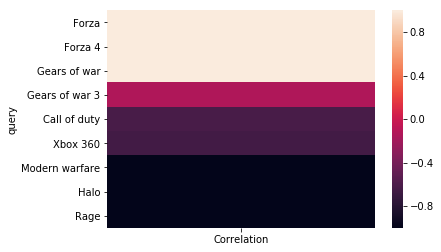

In [17]:
sns.heatmap(corr_category.sort_values('Correlation', ascending =False).head(10))